# **<font color='crimson'>SQL. Marketing Metrics</font>**

---

In [ ]:
###

## **CAC (Customer Acquisition Cost)**

In [ ]:
--1

In [ ]:
--получим номера id отмененных заказов
WITH orders_canceled AS (
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--посчитаем количество привлеченных в рамках кампании 1
--пользователей, ставших покупателями
buyers_1 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS buyers_1
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
        10105, 10122, 10134, 10135
        )
),
--посчитаем количество привлеченных в рамках кампании 2
--пользователей, ставших покупателями
buyers_2 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS buyers_2
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
        8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
        8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
        8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
        8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
        9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
        9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
        9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
        9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
        9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
        9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
        9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
        9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
        9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
        9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
        9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
        10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113,
        10131
        )
),
--создадим временную таблицу
id AS (
SELECT
    ROW_NUMBER() OVER () AS id
FROM
    user_actions AS t
LIMIT 2
)
--преобразуем временную таблицу, расчитав САС
SELECT
    CASE
    WHEN t.id = 1 THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
    ,CASE
    WHEN t.id = 1
    THEN ROUND(250000 * 1. / (
        SELECT t.buyers_1
        FROM buyers_1 AS t), 2)
    ELSE ROUND(250000 * 1. / (
        SELECT t.buyers_2
        FROM buyers_2 AS t), 2)
    END AS cac
FROM
    id AS t
ORDER BY
    2 DESC;

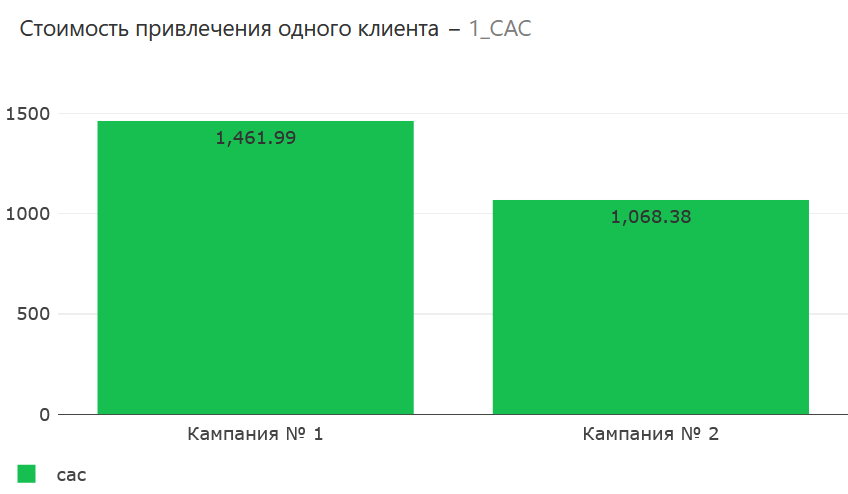

In [ ]:
###

## **ROI (Return On Investment)**

In [ ]:
--2
--получим номера id отмененных заказов
WITH orders_canceled AS (
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--получим id неотмененных заказов клиентов,
--привлеченных в рамках кампании 1
order_id_camp_1 AS (
    SELECT
        t.user_id
        ,t.order_id AS order_id_camp_1
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
        10105, 10122, 10134, 10135
        )
),
--получим id неотмененных заказов клиентов,
--привлеченных в рамках кампании 2
order_id_camp_2 AS (
    SELECT
        t.user_id
        ,t.order_id AS order_id_camp_2
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
        8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
        8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
        8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
        8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
        9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
        9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
        9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
        9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
        9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
        9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
        9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
        9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
        9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
        9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
        9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
        10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113,
        10131
        )
),
--'разворачиваем' списки с id каждого заказа из таблицы orders,
--оставив информацию только о заказах клиентов,
--привлеченных в рамках кампаний 1 и 2
unnest_table AS (
    SELECT
        t.order_id
        ,UNNEST(t.product_ids) AS product_id
    FROM
        orders AS t
    WHERE
        t.order_id IN (
            SELECT t.order_id_camp_1
            FROM order_id_camp_1 AS t)
        OR t.order_id IN (
            SELECT t.order_id_camp_2
            FROM order_id_camp_2 AS t)
),
--добавляем сведения о цене каждого товара
product_and_price AS(
    SELECT
        t.order_id
        ,t.product_id
        ,p.price
    FROM
        unnest_table AS t
        INNER JOIN products AS p
            ON t.product_id = p.product_id
    ORDER BY
        t.order_id ASC
),
--вычислим стоимость каждого заказа из таблицы unnest_table
order_cost AS (
SELECT
    DISTINCT t.order_id
    ,SUM(t.price) OVER (PARTITION BY t.order_id) AS order_cost
FROM
    product_and_price AS t
),
--объединим сведения о заказах клиентов из Кампании 1
--со стоимостью соответствующего заказа
--и сразу же рассчитаем общую стоимость заказов
--клиетнов, привлеченных по кампании №1
revenue_camp_1 AS (
    SELECT
        SUM(o.order_cost) AS revenue_camp_1
    FROM
        order_id_camp_1 AS t
        INNER JOIN order_cost AS o
            ON t.order_id_camp_1 = o.order_id
),
--объединим сведения о заказах клиентов из Кампании 2
--со стоимостью соответствующего заказа
--и сразу же рассчитаем общую стоимость заказов
--клиетнов, привлеченных по кампании №2
revenue_camp_2 AS (
    SELECT
        SUM(o.order_cost) AS revenue_camp_2
    FROM
        order_id_camp_2 AS t
        INNER JOIN order_cost AS o
            ON t.order_id_camp_2 = o.order_id
),
--создадим временную таблицу для итоговых расчетов
temp_table AS (
    SELECT
        ROW_NUMBER() OVER () AS id
    FROM
        user_actions AS t
    LIMIT 2
)
--рассчитаем ROI каждого рекламного канала
SELECT
    CASE
    WHEN t.id = 1 THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
    ,CASE
    WHEN t.id = 1 THEN (
        ROUND(((
            (SELECT t.revenue_camp_1 FROM revenue_camp_1 AS t)
            - 250000) / 250000. ) * 100, 2)
        )
    ELSE (
        ROUND(((
            (SELECT t.revenue_camp_2 FROM revenue_camp_2 AS t)
            - 250000) / 250000. ) * 100, 2)
        )
    END AS roi
FROM
    temp_table AS t
ORDER BY
    2 DESC;

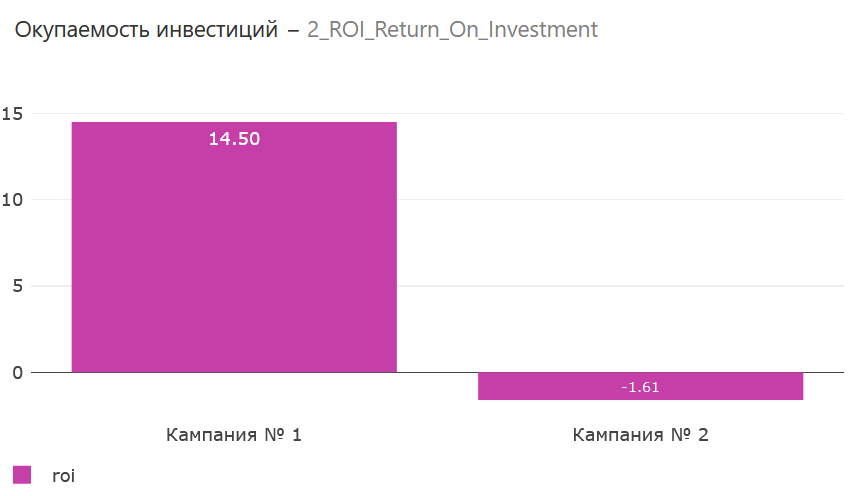

In [ ]:
###

## **Average Check**

In [ ]:
--3
--получим номера id отмененных заказов
WITH orders_canceled AS (
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--получим id неотмененных заказов клиентов,
--привлеченных в рамках кампании 1
--в период с 1 по 7 сентября 2022
order_id_camp_1 AS (
    SELECT
        t.user_id
        ,t.order_id AS order_id_camp_1
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
        10105, 10122, 10134, 10135
        )
        AND (t.time::DATE BETWEEN '2022-09-01' AND '2022-09-07')
),
--получим id неотмененных заказов клиентов,
--привлеченных в рамках кампании 2
--в период с 1 по 7 сентября 2022
order_id_camp_2 AS (
    SELECT
        t.user_id
        ,t.order_id AS order_id_camp_2
    FROM
        user_actions AS t
    WHERE
        t.order_id NOT IN (
            SELECT t.order_id_canceled
            FROM orders_canceled AS t)
        AND t.user_id IN (
        8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
        8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
        8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
        8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
        8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
        9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
        9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
        9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
        9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
        9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
        9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
        9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
        9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
        9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
        9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
        9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
        10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113,
        10131
        )
        AND (t.time::DATE BETWEEN '2022-09-01' AND '2022-09-07')
),
--'разворачиваем' списки с id каждого заказа из таблицы orders,
--оставив информацию только о заказах клиентов,
--привлеченных в рамках кампаний 1 и 2
unnest_table AS (
    SELECT
        t.order_id
        ,UNNEST(t.product_ids) AS product_id
    FROM
        orders AS t
    WHERE
        t.order_id IN (
            SELECT t.order_id_camp_1
            FROM order_id_camp_1 AS t)
        OR t.order_id IN (
            SELECT t.order_id_camp_2
            FROM order_id_camp_2 AS t)
),
--добавляем сведения о цене каждого товара
product_and_price AS(
    SELECT
        t.order_id
        ,t.product_id
        ,p.price
    FROM
        unnest_table AS t
        INNER JOIN products AS p
            ON t.product_id = p.product_id
    ORDER BY
        t.order_id ASC
),
--вычислим стоимость каждого заказа из таблицы unnest_table
order_cost AS (
SELECT
    DISTINCT t.order_id
    ,SUM(t.price) OVER (PARTITION BY t.order_id) AS order_cost
FROM
    product_and_price AS t
),
--объединим сведения о заказах клиентов из Кампании 1
--со стоимостью соответствующего заказа
order_camp_1 AS (
    SELECT
        t.user_id
        ,o.order_cost AS order_cost
    FROM
        order_id_camp_1 AS t
        INNER JOIN order_cost AS o
            ON t.order_id_camp_1 = o.order_id
),
--посчитаем средний размер заказа каждого клиента,
--привлеченного в рамках кампании 1
avg_user_order_camp_1 AS (
    SELECT
        DISTINCT t.user_id
        ,AVG(t.order_cost)
            OVER (PARTITION BY t.user_id)
            AS avg_user_order_camp_1
    FROM
        order_camp_1 AS t
),
--посчитаем средний размер заказа всех пользователей,
--привлеченных в рамках кампании 1
avg_order_1 AS (
    SELECT
        ROUND(AVG(t.avg_user_order_camp_1), 2) AS avg_order_1
    FROM
        avg_user_order_camp_1 As t
),
--объединим сведения о заказах клиентов из Кампании 2
--со стоимостью соответствующего заказа
order_camp_2 AS (
    SELECT
        t.user_id
        ,o.order_cost AS order_cost
    FROM
        order_id_camp_2 AS t
        INNER JOIN order_cost AS o
            ON t.order_id_camp_2 = o.order_id
),
--посчитаем средний размер заказа каждого клиента,
--привлеченного в рамках кампании 2
avg_user_order_camp_2 AS (
    SELECT
        DISTINCT t.user_id
        ,AVG(t.order_cost)
            OVER (PARTITION BY t.user_id)
            AS avg_user_order_camp_2
    FROM
        order_camp_2 AS t
),
--посчитаем средний размер заказа всех пользователей,
--привлеченных в рамках кампании 2
avg_order_2 AS (
    SELECT
        ROUND(AVG(t.avg_user_order_camp_2), 2) AS avg_order_2
    FROM
        avg_user_order_camp_2 As t
),
--создадим временную таблицу для итоговых расчетов
temp_table AS (
    SELECT
        ROW_NUMBER() OVER () AS id
    FROM
        user_actions AS t
    LIMIT 2
)
--рассчитаем ROI каждого рекламного канала
SELECT
    CASE
    WHEN t.id = 1 THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
    ,CASE
    WHEN t.id = 1 THEN (
        SELECT t.avg_order_1
        FROM avg_order_1 AS t)
    ELSE (
        SELECT t.avg_order_2
        FROM avg_order_2 AS t)
    END AS avg_check
FROM
    temp_table AS t
ORDER BY
    2 DESC;

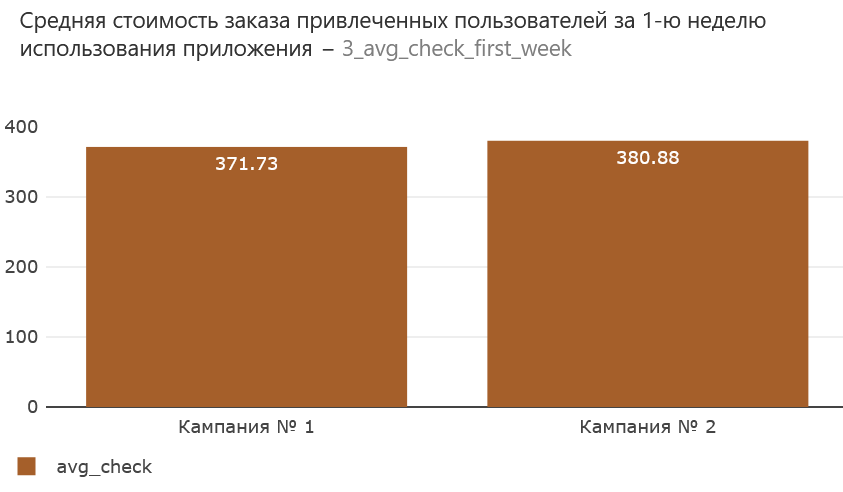

In [ ]:
###

## **Retention**

In [ ]:
--отбираем сведения о пользователях,
--которые начали использовтаь сервис 25 августа
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    DISTINCT t.user_id
    ,t.date
    ,t.start_date
FROM
    subquery AS t
WHERE
    t.start_date = '2022-08-25'
LIMIT 100

In [ ]:
--для каждой даты посчитаем количество уникальных пользователей,
--которые начали использовать сервис 25 августа
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    t.date
    ,COUNT(DISTINCT t.user_id)
FROM
    subquery AS t
WHERE
    t.start_date = '2022-08-25'
GROUP BY
    t.date
LIMIT 100

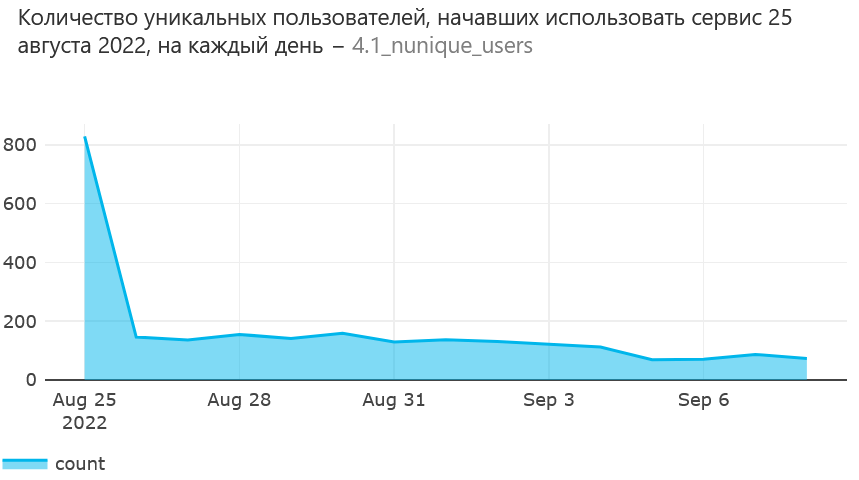

In [ ]:
--для каждой даты посчитаем, какой процент пользователей,
--начавших использовать сервис 25 августа 2022,
--продолжают им пользоваться в последующие дни
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    t.date
    ,COUNT(DISTINCT t.user_id) AS active_users
    --добавляем нормирование
    ,COUNT(DISTINCT t.user_id)::FLOAT /
        MAX(COUNT(DISTINCT t.user_id))
        OVER () AS percentage_of_users
FROM
    subquery AS t
WHERE
    t.start_date = '2022-08-25'
GROUP BY
    t.date
LIMIT 100

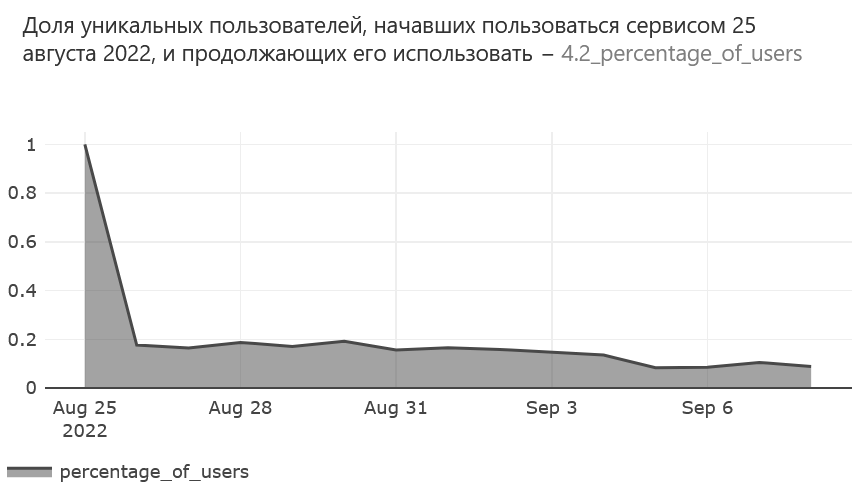

In [ ]:
--добавим вторую когорту: пользователей,
--начавших пользоваться сервисом 26 авугста 2022;
--для каждой даты посчитаем, какой процент пользователей,
--начавших использовать сервис 25 и 26 августа 2022,
--продолжают им пользоваться в последующие дни
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    t.date
    ,COUNT(DISTINCT t.user_id) AS active_users
    --добавляем нормирование
    ,COUNT(DISTINCT t.user_id)::FLOAT /
        MAX(COUNT(DISTINCT t.user_id))
        OVER (PARTITION BY t.start_date) AS percentage_of_users
    ,t.start_date
FROM
    subquery AS t
WHERE
    t.start_date IN ('2022-08-25', '2022-08-26')
GROUP BY
    t.date
    ,t.start_date
LIMIT 100

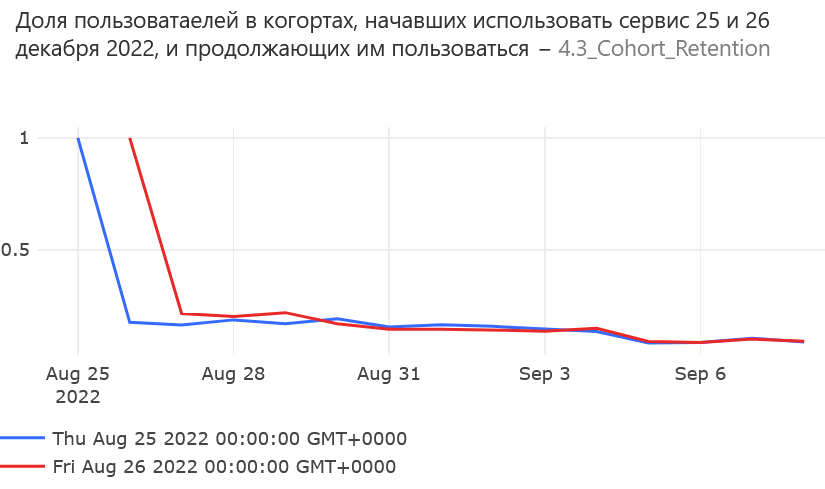

In [ ]:
--изучим все когорты пользователей;
--для каждой даты посчитаем, какой процент пользователей,
--начавших использовать сервис в соответствующий день,
--продолжают им пользоваться в последующие дни
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    t.date
    ,COUNT(DISTINCT t.user_id) AS active_users
    --добавляем нормирование
    ,COUNT(DISTINCT t.user_id)::FLOAT /
        MAX(COUNT(DISTINCT t.user_id))
        OVER (PARTITION BY t.start_date) AS percentage_of_users
    ,t.start_date
    --извлечем месяцы из стартовой даты и даты активности
    ,DATE_TRUNC('month', t.start_date) AS start_month
    ,DATE_TRUNC('month', t.date) AS month
FROM
    subquery AS t
GROUP BY
    t.date
    ,t.start_date

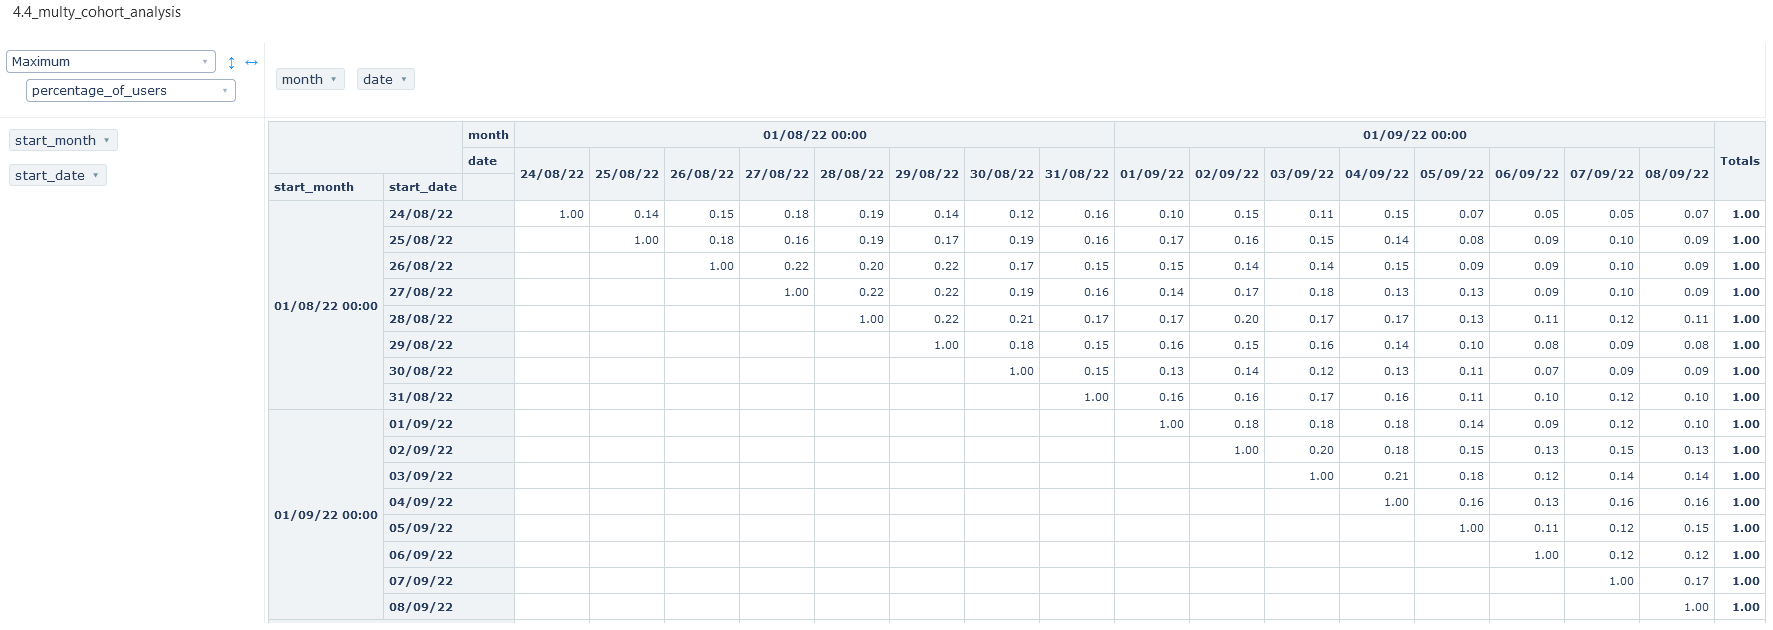

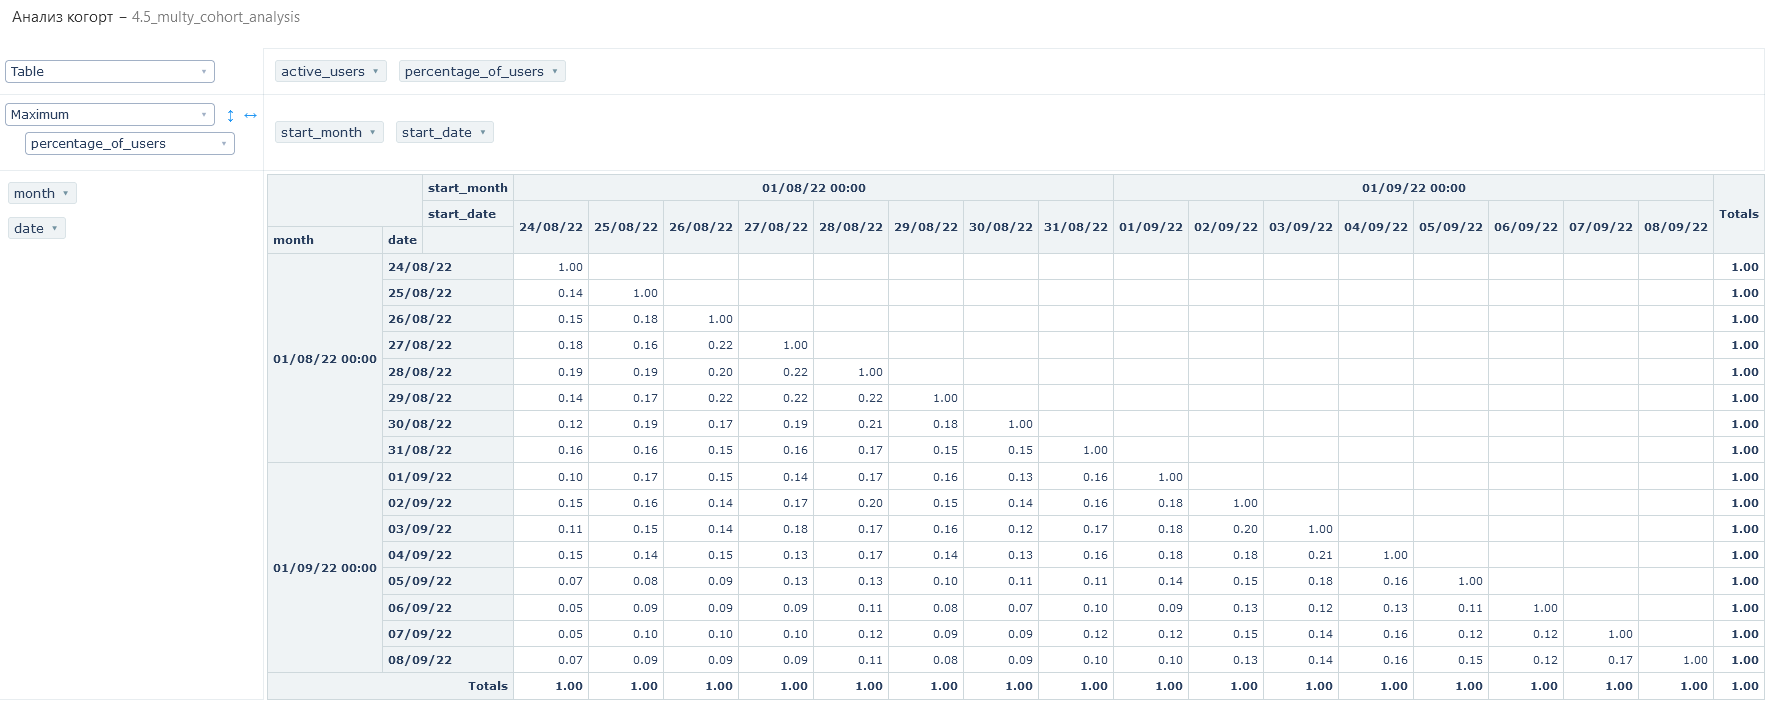

In [ ]:
--посмотрим, как отличается Retention
--в разрезе каждого дня
WITH subquery AS (
SELECT
    t.user_id
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
    ,t.time::DATE AS date
FROM
    user_actions AS t
)
SELECT
    t.date
    ,COUNT(DISTINCT t.user_id) AS active_users
    --добавляем нормирование
    ,COUNT(DISTINCT t.user_id)::FLOAT /
        MAX(COUNT(DISTINCT t.user_id))
        OVER (PARTITION BY t.start_date) AS percentage_of_users
    ,t.start_date
    --извлечем месяцы из стартовой даты и даты активности
    ,DATE_TRUNC('month', t.start_date) AS start_month
    ,DATE_TRUNC('month', t.date) AS month
    --добавим переменную, которая покажет, сколько дней прошло
    --с момента даты активности и стартовой даты
    ,t.date - t.start_date AS dt_n
FROM
    subquery AS t
GROUP BY
    t.date
    ,t.start_date

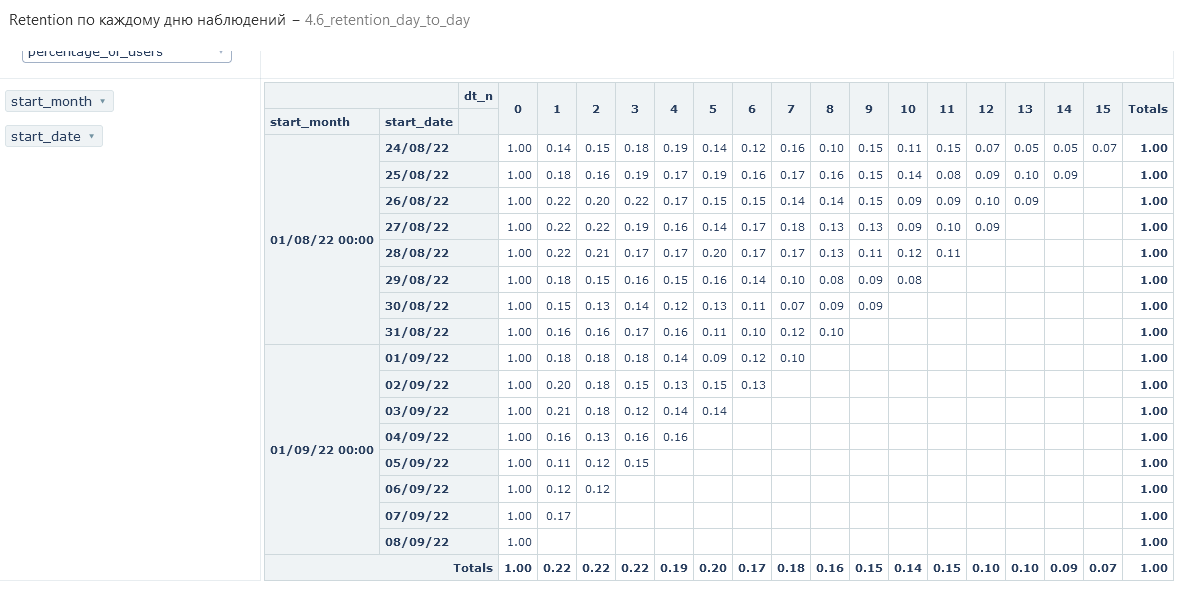

Окно, которое определяет когорту, может меняться. Мы можем построить сводную таблицу, где в качестве когорты будет выбран не конкретный день, когда пользователи зарегистрировались, а неделю. Т.е. пользователи, которые зарегистрировались в первую неделю, попадают в первую когорту, зарегистрировавшиеся во вторую неделю - во вторую когорту. В этом случае шагом Retention является неделя. Анализируется, сколько пользователей, которые зарегистрировались в первую неделю, продолжают пользоваться сервисом во вторую.

In [ ]:
--4
--для каждого пользователя определим
--дату самого первого действия в сервисе
WITH start_date AS (
SELECT
    t.user_id
    ,t.time::DATE AS date
    ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
FROM
    user_actions AS t
),
--сделаем группировку по двум полям: дате первого действия
--и каждой текущей дате, представленной в данных;
--это позволит посчитать для каждой когорты число клиентов,
--продолжающих пользоваться сервисом в каждый последующий день
count_users AS (
    SELECT
        t.date
        ,t.start_date
        ,COUNT(DISTINCT t.user_id) AS count_users
    FROM
        start_date As t
    GROUP BY
        t.start_date
        ,t.date
    ORDER BY
        t.start_date ASC
        ,t.date ASC
),
--посчитаем Retention, т.е. долю уникальных пользователей
--в общем числе пользователей в когорте
--(числе пользователей в нулевой день)
retention AS (
    SELECT
        t.date
        ,t.start_date
        ,ROUND(t.count_users *1. / MAX(t.count_users)
            OVER (PARTITION BY t.start_date), 2)
            AS retention
    FROM
        count_users AS t
    ORDER BY
        t.start_date ASC
        ,t.date ASC
)
--извлечем из текущей даты сведения о начале месяца;
--дополнительно рассчитаем разницу в днях между каждой
--текущей датой и датой первого взаимодействия
SELECT
    DATE_TRUNC('month', t.start_date)::DATE AS start_month
    ,t.start_date
    ,t.date - t.start_date AS day_number
    ,t.retention
FROM
    retention AS t
ORDER BY
    t.start_date ASC
    ,t.date - t.start_date ASC;

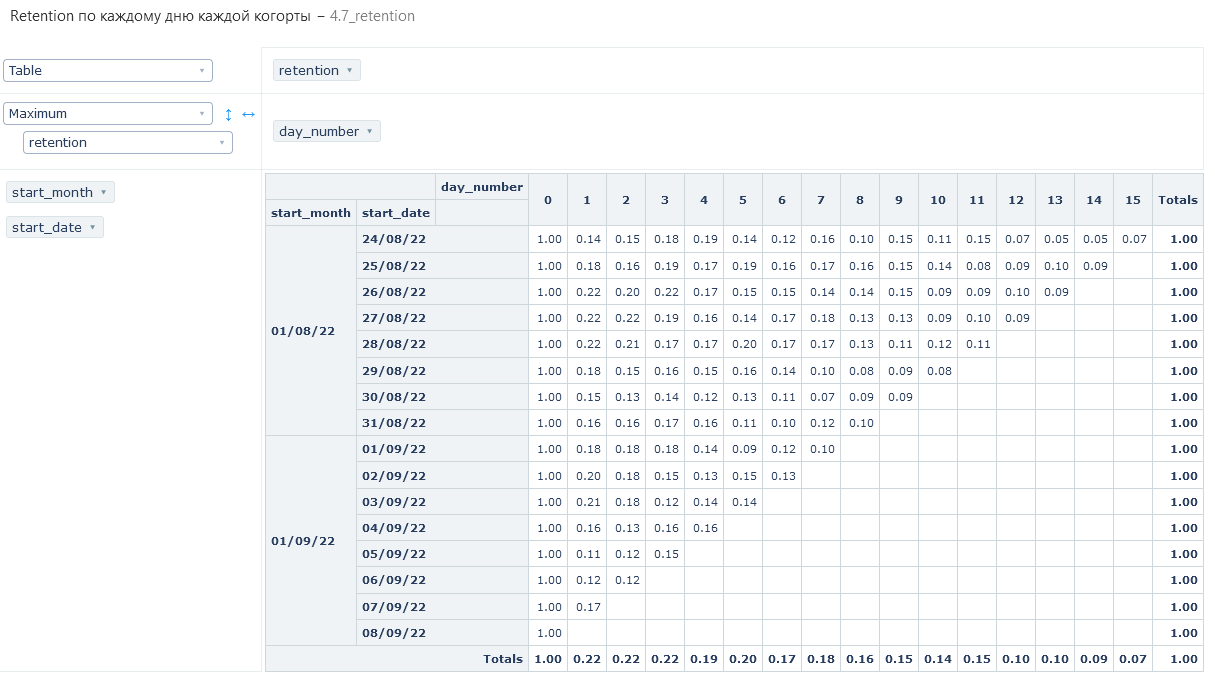

In [ ]:
###

In [ ]:
--5
--отберем клиентов, которые начали пользоваться сервисом
--по итогам двух рекламных кампаний,
--а также дату, в которую каждый из пользователей
--совершил первое действие
WITH users_camp AS(
    SELECT
        t.user_id
        ,t.time::DATE AS date
        ,MIN(t.time::DATE) OVER (PARTITION BY t.user_id) AS start_date
        ,CASE
        WHEN t.user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
        10105, 10122, 10134, 10135
        ) THEN 'Кампания № 1'
        ELSE 'Кампания № 2'
        END AS ads_campaign
    FROM
        user_actions AS t
    WHERE
        t.user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
        10105, 10122, 10134, 10135
        )
        OR t.user_id IN (
        8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
        8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
        8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
        8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
        8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
        9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
        9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
        9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
        9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
        9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
        9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
        9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
        9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
        9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
        9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
        9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
        10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131
        )
),
--рассчитаем retention по рекламным кампаниям
retention AS (
    SELECT
        t.ads_campaign
        ,t.date
        ,t.start_date
        ,COUNT(DISTINCT t.user_id)::FLOAT /
            MAX(COUNT(DISTINCT t.user_id))
            OVER (PARTITION BY t.ads_campaign)
            AS retention
    FROM
        users_camp AS t
    GROUP BY
        t.ads_campaign
        ,t.date
        ,t.start_date
    ORDER BY
        t.ads_campaign ASC
)
SELECT
    t.ads_campaign
    ,t.start_date
    ,t.date - t.start_date AS day_number
    ,ROUND(t.retention::DECIMAL, 2) AS retention
FROM
    retention AS t
WHERE
    t.date - t.start_date IN (0, 1, 7)
ORDER BY
    t.ads_campaign ASC
    ,t.date - t.start_date ASC;

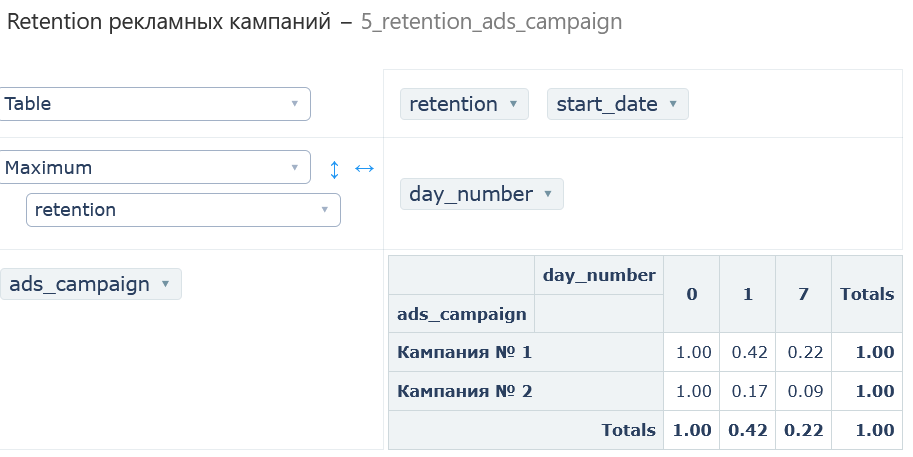

In [ ]:
###

### Запрос для двух рекламных кампаний одновременно.

In [ ]:
--6
--получим id заказов, которые были отменены
WITH orders_canceled AS(
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--получим id клиентов и id заказов, сформированных
--в рамках кампаний 1 и 2, в разрезе кампаний 1 и 2
user_order_camp AS (
SELECT
    t.user_id
    ,t.order_id
    ,t.time::DATE AS date
    ,CASE
    WHEN t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
FROM
    user_actions AS t
WHERE
    t.order_id NOT IN (
        SELECT t.order_id_canceled
        FROM orders_canceled AS t)
    AND (t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    OR t.user_id IN (
    8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
    8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
    8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
    8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
    8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
    9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
    9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
    9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
    9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
    9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
    9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
    9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
    9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
    9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
    9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
    9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
    10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131))
LIMIT 2000
),
--'развернем' списки товаров в заказах
unnest_table AS (
    SELECT
        t.order_id
        ,UNNEST(t.product_ids) AS product_id
    FROM
        orders AS t
),
--добавим сведения о стоимости каждого товара
product_and_price AS (
    SELECT
        t.order_id
        ,t.product_id
        ,p.price
    FROM
        unnest_table AS t
        LEFT JOIN products AS p
            ON t.product_id = p.product_id
),
--посчитаем стоимость каждого заказа
order_cost AS (
    SELECT
        DISTINCT t.order_id
        ,SUM(t.price) OVER (PARTITION BY t.order_id) AS order_cost
    FROM
        product_and_price AS t
),
--объединим сведения о клиентах, пришедших в рамках кампаний 1 и 2,
--номерах и стоимости их заказов
users_orders_cost AS(
    SELECT
        t.date
        ,t.user_id
        ,t.order_id
        ,t.ads_campaign
        ,o.order_cost
    FROM
        user_order_camp AS t
        LEFT JOIN order_cost AS o
            ON t.order_id = o.order_id
),
--для каждой рекламной кампании в целом рассчитаем объем продаж;
--для каждой рекламной кампании
--для каждого дня рассчитаем объем продаж;
--дополнительно укажем стартовый день начала каждой кампании
pivot_table AS (
SELECT
    DISTINCT t.ads_campaign
    ,t.date
    ,MIN(t.date) OVER (PARTITION BY t.ads_campaign) AS start_day
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign)
        AS total_cost
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign ORDER BY t.date ASC)
        AS day_cost
FROM
    users_orders_cost AS t
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 1
user_camp_1 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_1
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 1'
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 2
user_camp_2 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_2
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 2'
),
--добавим в сводную таблицу информацию о количестве
--уникальных пользоваталей
--на первую дату начала каждой кампании
temp_table AS (
SELECT
    t.ads_campaign
    ,t.date
    ,t.start_day
    ,t.day_cost
    ,t.total_cost
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN (SELECT t.user_camp_1 FROM user_camp_1 AS t)
    ELSE (SELECT t.user_camp_2 FROM user_camp_2 AS t)
    END AS user_number
FROM
    pivot_table AS t
ORDER BY
    t.ads_campaign ASC
    ,t.date ASC
)
--рассчитаем накопленный arppu отдельно для каждого дня
--каждой рекламной кампании;
--дополнительно добавим сведения о САС каждой кампании,
--рассчитанные ранее
SELECT
    t.ads_campaign
    ,CONCAT('Day ', t.date - t.start_day) AS day
    ,ROUND(t.day_cost * 1. / t.user_number, 2)
        AS cumulative_arppu
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN 1461.99
    ELSE 1068.38
    END cac
FROM
    temp_table AS t
ORDER BY
    t.ads_campaign ASC
    ,CONCAT('Day ', t.date - t.start_day) ASC;

### Запрос для рекламной кампании 1.

In [ ]:
--получим id заказов, которые были отменены
WITH orders_canceled AS(
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--получим id клиентов и id заказов, сформированных
--в рамках кампаний 1 и 2, в разрезе кампаний 1 и 2
user_order_camp AS (
SELECT
    t.user_id
    ,t.order_id
    ,t.time::DATE AS date
    ,CASE
    WHEN t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
FROM
    user_actions AS t
WHERE
    t.order_id NOT IN (
        SELECT t.order_id_canceled
        FROM orders_canceled AS t)
    AND (t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    OR t.user_id IN (
    8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
    8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
    8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
    8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
    8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
    9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
    9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
    9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
    9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
    9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
    9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
    9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
    9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
    9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
    9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
    9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
    10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131))
LIMIT 2000
),
--'развернем' списки товаров в заказах
unnest_table AS (
    SELECT
        t.order_id
        ,UNNEST(t.product_ids) AS product_id
    FROM
        orders AS t
),
--добавим сведения о стоимости каждого товара
product_and_price AS (
    SELECT
        t.order_id
        ,t.product_id
        ,p.price
    FROM
        unnest_table AS t
        LEFT JOIN products AS p
            ON t.product_id = p.product_id
),
--посчитаем стоимость каждого заказа
order_cost AS (
    SELECT
        DISTINCT t.order_id
        ,SUM(t.price) OVER (PARTITION BY t.order_id) AS order_cost
    FROM
        product_and_price AS t
),
--объединим сведения о клиентах, пришедших в рамках кампаний 1 и 2,
--номерах и стоимости их заказов
users_orders_cost AS(
    SELECT
        t.date
        ,t.user_id
        ,t.order_id
        ,t.ads_campaign
        ,o.order_cost
    FROM
        user_order_camp AS t
        LEFT JOIN order_cost AS o
            ON t.order_id = o.order_id
),
--для каждой рекламной кампании в целом рассчитаем объем продаж;
--для каждой рекламной кампании
--для каждого дня рассчитаем объем продаж;
--дополнительно укажем стартовый день начала каждой кампании
pivot_table AS (
SELECT
    DISTINCT t.ads_campaign
    ,t.date
    ,MIN(t.date) OVER (PARTITION BY t.ads_campaign) AS start_day
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign)
        AS total_cost
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign ORDER BY t.date ASC)
        AS day_cost
FROM
    users_orders_cost AS t
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 1
user_camp_1 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_1
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 1'
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 2
user_camp_2 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_2
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 2'
),
--добавим в сводную таблицу информацию о количестве
--уникальных пользоваталей
--на первую дату начала каждой кампании
temp_table AS (
SELECT
    t.ads_campaign
    ,t.date
    ,t.start_day
    ,t.day_cost
    ,t.total_cost
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN (SELECT t.user_camp_1 FROM user_camp_1 AS t)
    ELSE (SELECT t.user_camp_2 FROM user_camp_2 AS t)
    END AS user_number
FROM
    pivot_table AS t
ORDER BY
    t.ads_campaign ASC
    ,t.date ASC
)
--рассчитаем накопленный arppu отдельно для каждого дня
--каждой рекламной кампании;
--дополнительно добавим сведения о САС каждой кампании,
--рассчитанные ранее
SELECT
    t.ads_campaign
    ,CONCAT('Day ', t.date - t.start_day) AS day
    ,ROUND(t.day_cost * 1. / t.user_number, 2)
        AS cumulative_arppu
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN 1461.99
    ELSE 1068.38
    END cac
FROM
    temp_table AS t
WHERE
    t.ads_campaign = 'Кампания № 1'
ORDER BY
    t.ads_campaign ASC
    ,CONCAT('Day ', t.date - t.start_day) ASC;

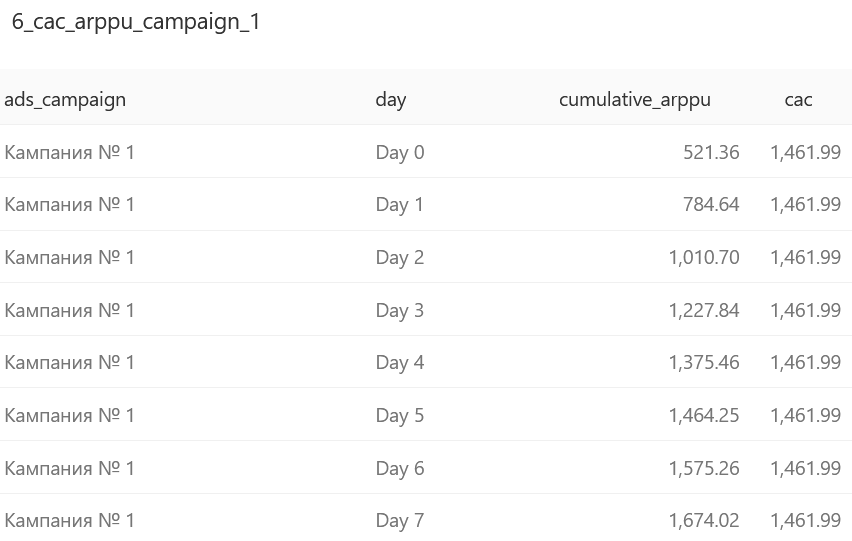

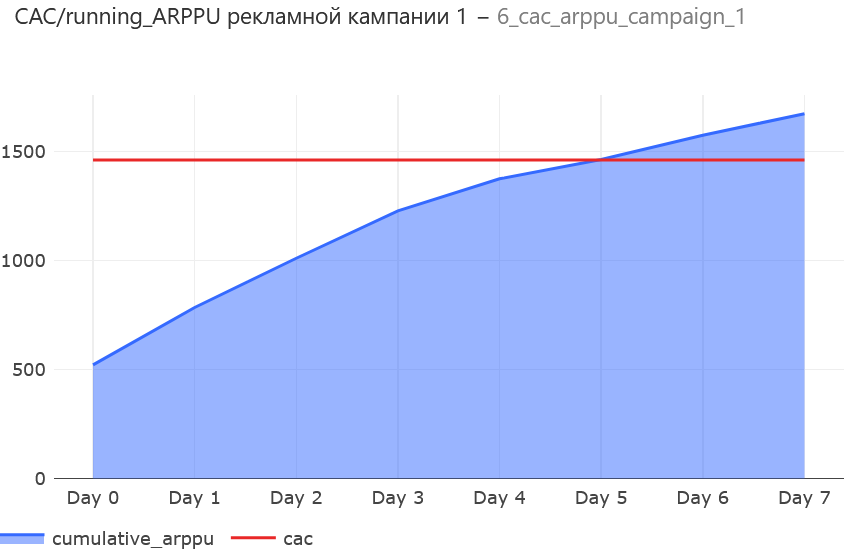

### Запрос для рекламной кампании 2

In [ ]:
--получим id заказов, которые были отменены
WITH orders_canceled AS(
    SELECT
        t.order_id AS order_id_canceled
    FROM
        user_actions AS t
    WHERE
        t.action = 'cancel_order'
),
--получим id клиентов и id заказов, сформированных
--в рамках кампаний 1 и 2, в разрезе кампаний 1 и 2
user_order_camp AS (
SELECT
    t.user_id
    ,t.order_id
    ,t.time::DATE AS date
    ,CASE
    WHEN t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    THEN 'Кампания № 1'
    ELSE 'Кампания № 2'
    END AS ads_campaign
FROM
    user_actions AS t
WHERE
    t.order_id NOT IN (
        SELECT t.order_id_canceled
        FROM orders_canceled AS t)
    AND (t.user_id IN (
    8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741,
    8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845,
    8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972,
    8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071,
    9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175,
    9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317,
    9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472,
    9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550,
    9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654,
    9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762,
    9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871,
    9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998,
    9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103,
    10105, 10122, 10134, 10135)
    OR t.user_id IN (
    8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681,
    8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754,
    8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851,
    8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929,
    8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000,
    9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117,
    9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203,
    9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289,
    9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383,
    9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497,
    9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567,
    9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692,
    9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757,
    9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863,
    9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930,
    9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058,
    10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131))
LIMIT 2000
),
--'развернем' списки товаров в заказах
unnest_table AS (
    SELECT
        t.order_id
        ,UNNEST(t.product_ids) AS product_id
    FROM
        orders AS t
),
--добавим сведения о стоимости каждого товара
product_and_price AS (
    SELECT
        t.order_id
        ,t.product_id
        ,p.price
    FROM
        unnest_table AS t
        LEFT JOIN products AS p
            ON t.product_id = p.product_id
),
--посчитаем стоимость каждого заказа
order_cost AS (
    SELECT
        DISTINCT t.order_id
        ,SUM(t.price) OVER (PARTITION BY t.order_id) AS order_cost
    FROM
        product_and_price AS t
),
--объединим сведения о клиентах, пришедших в рамках кампаний 1 и 2,
--номерах и стоимости их заказов
users_orders_cost AS(
    SELECT
        t.date
        ,t.user_id
        ,t.order_id
        ,t.ads_campaign
        ,o.order_cost
    FROM
        user_order_camp AS t
        LEFT JOIN order_cost AS o
            ON t.order_id = o.order_id
),
--для каждой рекламной кампании в целом рассчитаем объем продаж;
--для каждой рекламной кампании
--для каждого дня рассчитаем объем продаж;
--дополнительно укажем стартовый день начала каждой кампании
pivot_table AS (
SELECT
    DISTINCT t.ads_campaign
    ,t.date
    ,MIN(t.date) OVER (PARTITION BY t.ads_campaign) AS start_day
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign)
        AS total_cost
    ,SUM(t.order_cost)
        OVER (PARTITION BY t.ads_campaign ORDER BY t.date ASC)
        AS day_cost
FROM
    users_orders_cost AS t
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 1
user_camp_1 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_1
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 1'
),
--посчитаем число уникальных клиентов
--на момент начала Кампании 2
user_camp_2 AS (
    SELECT
        COUNT(DISTINCT t.user_id) AS user_camp_2
    FROM
        users_orders_cost AS t
    WHERE
        t.ads_campaign = 'Кампания № 2'
),
--добавим в сводную таблицу информацию о количестве
--уникальных пользоваталей
--на первую дату начала каждой кампании
temp_table AS (
SELECT
    t.ads_campaign
    ,t.date
    ,t.start_day
    ,t.day_cost
    ,t.total_cost
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN (SELECT t.user_camp_1 FROM user_camp_1 AS t)
    ELSE (SELECT t.user_camp_2 FROM user_camp_2 AS t)
    END AS user_number
FROM
    pivot_table AS t
ORDER BY
    t.ads_campaign ASC
    ,t.date ASC
)
--рассчитаем накопленный arppu отдельно для каждого дня
--каждой рекламной кампании;
--дополнительно добавим сведения о САС каждой кампании,
--рассчитанные ранее
SELECT
    t.ads_campaign
    ,CONCAT('Day ', t.date - t.start_day) AS day
    ,ROUND(t.day_cost * 1. / t.user_number, 2)
        AS cumulative_arppu
    ,CASE
    WHEN t.ads_campaign = 'Кампания № 1'
    THEN 1461.99
    ELSE 1068.38
    END cac
FROM
    temp_table AS t
WHERE
    t.ads_campaign = 'Кампания № 2'
ORDER BY
    t.ads_campaign ASC
    ,CONCAT('Day ', t.date - t.start_day) ASC;

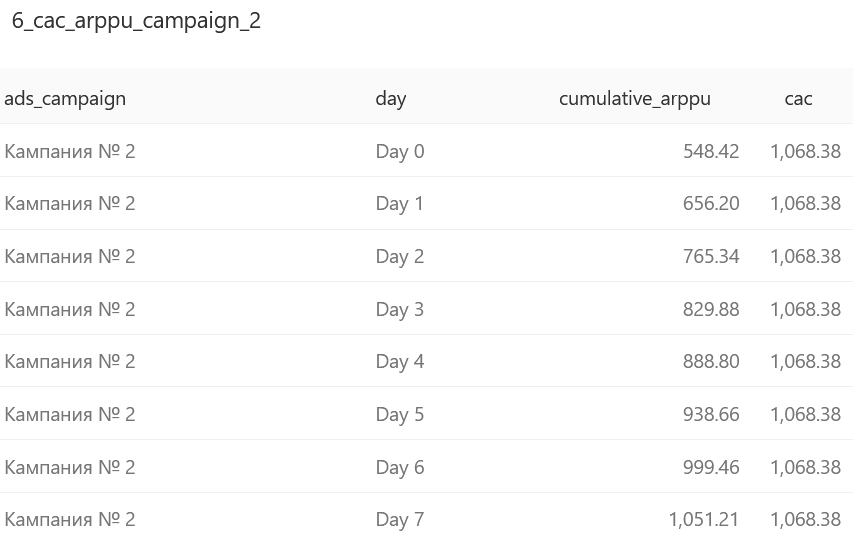

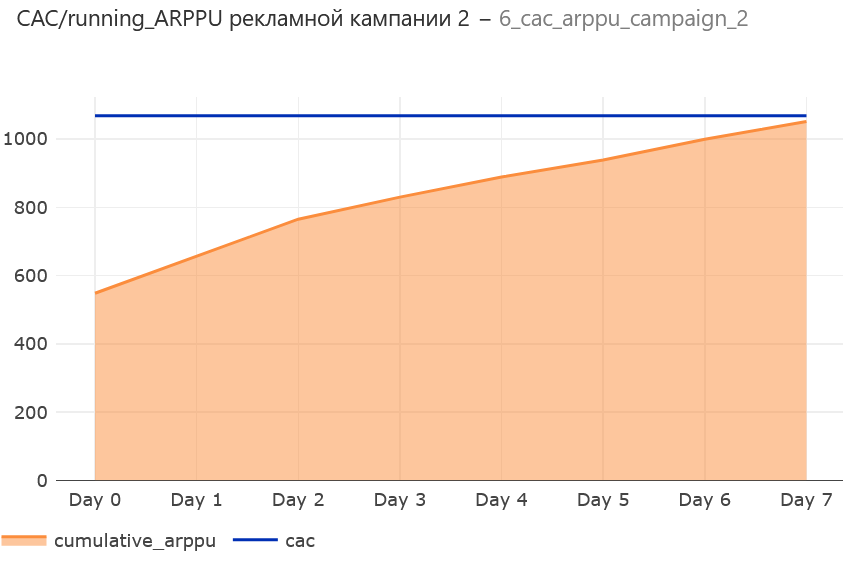